**MATERIA:** MACHINE LEARNING

**DATASET:** "CAR SALES"

# **PRE-PROCESAMIENTO DE LOS DATOS**

## IMPORTAMOS LIBRERIAS Y CARGAMOS DATOS DEL ARCHIVO CSV




In [ ]:
# IMPORTACION DE LIBRERIAS
#Importar librerias graficas
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#Importar librerias data frames
import numpy as np
import pandas as pd

#Importar de sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

#Modelos de regresion
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

# Importar de sklearn Metricas y Scoring de Regresion
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
# CARGAMOS EL DATASET DE VENTA DE CARROS "car_sales.csv", el archivo se encuentra en un repositorio git compartido publico
url = 'https://raw.githubusercontent.com/mn-ariel/course_machine_learning/main/data%20processing/dataset/dataset_rental_price.csv'
df = pd.read_csv(url)

##EXPLORACION Y ENTENDIMIENTO DE LOS DATOS

###REVISAMOS LOS DATOS DE CABECERA

In [ ]:
df.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,0.0,Semifurnished,All,"Bella Casa Baner, Baner, , Pune, Maharashtra",1,No Direction,Not provided,No,...,0,0,0,0,0,0,0,0,0.0,18500.0
1,2,2,1050.0,Semifurnished,All,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",2,West,Not provided,Yes,...,0,0,0,0,0,0,0,63000,0.0,21000.0
2,2,2,900.0,Semifurnished,All,"Simplicity Apartments, Handewadi, , Pune, Maha...",6,No Direction,Not provided,Yes,...,0,0,0,0,0,0,0,25000,0.0,12000.0
3,3,3,1100.0,Furnished,Family Only,"GK Dwarka Queens Park, Rahatani, , Pune, Mahar...",1,East,Others,Yes,...,0,0,0,0,0,0,24000,3,0.0,24000.0
4,1,1,605.0,Semifurnished,Family Only,"Anandtara Sayajiraje Avenue, Sasane Colony, , ...",4,East,Vitrified,Yes,...,0,0,1,0,0,0,0,3,0.0,13500.0


###REVISAMOS TIPOS DE DATOS DE LAS COLUMNAS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16042 entries, 0 to 16041
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            16042 non-null  int64  
 1   bathrooms          16042 non-null  int64  
 2   area               16042 non-null  float64
 3   furnishing         16042 non-null  object 
 4   avalable_for       16042 non-null  object 
 5   address            16042 non-null  object 
 6   floor_number       16042 non-null  int64  
 7   facing             16042 non-null  object 
 8   floor_type         16042 non-null  object 
 9   gate_community     16042 non-null  object 
 10  corner_pro         16042 non-null  object 
 11  parking            16042 non-null  int64  
 12  wheelchairadption  16042 non-null  object 
 13  petfacility        16042 non-null  object 
 14  aggDur             16042 non-null  int64  
 15  noticeDur          16042 non-null  int64  
 16  lightbill          160

###VERIFICAR LA CANTIDAD DE DATOS DEL DATASET

In [ ]:
df.shape

(16042, 30)

###VERIFICAR LOS DATOS FALTANTES O NULOS Y DUPLICADOS DEL DATASET

In [ ]:
def check_missing_and_duplicates(df):
    missing_data = df.isnull().sum()
    duplicate_data = df.duplicated().sum()

    has_missing = False
    has_duplicates = False

    if missing_data.any():
        has_missing = True
        print("Datos faltantes en el dataset:")
        print(missing_data[missing_data > 0])

    if duplicate_data > 0:
        has_duplicates = True
        print(f"El dataset contiene {duplicate_data} filas duplicadas.")

    if not has_missing and not has_duplicates:
        print("No hay datos faltantes ni duplicados en el dataset.")

    return has_missing, has_duplicates

In [ ]:
missing, duplicates = check_missing_and_duplicates(df)

No hay datos faltantes ni duplicados en el dataset.


No se encontro datos faltantes en el dataset ni duplicados

###VERFICAR LAS ESTADISTICAS DEL DATASET

Validamos las estadisticas completas del dataset tanto para columnas numericas como para columnas categoricas

In [ ]:
df.describe(include = 'all') #incluye valores numericos y categoricos

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
count,16042.000000,16042.000000,16042.000000,16042,16042,16042,16042.000000,16042,16042,16042,...,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042,16042.000000,1.604200e+04,16042.000000,1.604200e+04
unique,NaN,NaN,NaN,4,8,8645,NaN,9,15,2,...,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Unfurnished,All,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",NaN,East,Not provided,Yes,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,7028,7926,112,NaN,5877,6429,9387,...,NaN,NaN,NaN,NaN,NaN,13277,NaN,NaN,NaN,NaN
mean,1.795911,1.778581,534.948036,NaN,NaN,NaN,3.067947,NaN,NaN,NaN,...,0.061464,0.049744,0.124610,0.031729,0.044072,NaN,6949.279890,1.490595e+05,254.167965,2.486475e+04
std,0.790971,0.814797,998.850161,NaN,NaN,NaN,2.402256,NaN,NaN,NaN,...,0.240186,0.217423,0.330287,0.175284,0.205261,NaN,17199.295354,1.421182e+07,1248.647638,9.746501e+05
min,1.000000,1.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,1.600000e+03
25%,1.000000,1.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,4.000000e+00,0.000000,1.050000e+04
50%,2.000000,2.000000,520.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,3.000000e+04,0.000000,1.500000e+04
75%,2.000000,2.000000,840.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,8000.000000,5.000000e+04,0.000000,2.100000e+04


###ANALISIS Y CORRECION COLUMNAS NUMERICAS (VALORES ATIPICOS, NULOS Y OTROS)


####ESTADISTICAS Y DISTRIBUCIONES GENERALES PARA LAS COLUMNAS NUMERICAS

Cuadro de medidas estadisticas de las columnas numericas

In [ ]:
df.describe() # Estadisticas solo valores numericos

,bedroom,bathrooms,area,floor_number,parking,aggDur,noticeDur,lightbill,powerbackup,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
count,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042.00000,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,1.604200e+04,16042.000000,1.604200e+04
mean,1.795911,1.778581,534.948036,3.067947,0.882122,7.439908,0.724847,0.173731,0.709513,0.75053,0.061464,0.049744,0.124610,0.031729,0.044072,6949.279890,1.490595e+05,254.167965,2.486475e+04
std,0.790971,0.814797,998.850161,2.402256,0.562534,7.726291,0.701307,0.378890,0.842586,0.43272,0.240186,0.217423,0.330287,0.175284,0.205261,17199.295354,1.421182e+07,1248.647638,9.746501e+05
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.600000e+03
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,1.050000e+04
50%,2.000000,2.000000,520.000000,3.000000,1.000000,11.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+04,0.000000,1.500000e+04
75%,2.000000,2.000000,840.000000,5.000000,1.000000,11.000000,1.000000,0.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,5.000000e+04,0.000000,2.100000e+04
max,22.000000,22.000000,72775.000000,9.000000,9.000000,36.000000,6.000000,1.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,300000.000000,1.800050e+09,45000.000000,1.234568e+08


Una forma común de identificar valores atípicos es mediante el método del rango intercuartil (IQR). En este método, consideramos que un valor es atípico si está por debajo del primer cuartil (Q1) menos 1.5 veces el IQR o por encima del tercer cuartil (Q3) más 1.5 veces el IQR.

Aquí hay una función que identifica columnas con valores atípicos en un DataFrame

In [ ]:
def detectar_outliers(df, multiplier=2.5):
    continuous_columns = df.select_dtypes(include=[np.number]).columns
    outlier_columns = []

    for column in continuous_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        if not outliers.empty:
            outlier_columns.append(column)

    return outlier_columns



Esta función toma un DataFrame de Pandas y un valor opcional para el multiplicador del rango intercuartil (por defecto es 1.5). La función devuelve una lista de las columnas que contienen valores atípicos.

In [ ]:
# Uso de la función
outlier_columns = detectar_outliers(df)

print("Columnas con valores atípicos:", outlier_columns)

Columnas con valores atípicos: ['bedroom', 'bathrooms', 'area', 'parking', 'noticeDur', 'lightbill', 'no_room', 'pooja_room', 'study_room', 'others', 'servant_room', 'store_room', 'brok_amt', 'deposit_amt', 'mnt_amt', 'rent']


In [ ]:
def graficar_boxplot_variables_continuas(df):
    # Seleccionar solo las columnas numéricas del DataFrame
    variables_continuas = df.select_dtypes(include=['float64', 'int64'])

    num_plots = len(variables_continuas.columns)
    num_cols = 3
    num_rows = num_plots // num_cols + (1 if num_plots % num_cols > 0 else 0)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axs = axs.ravel()

    # Generar boxplot para cada variable continua
    for index, variable in enumerate(variables_continuas.columns):
        sns.boxplot(data=df, x=variable, ax=axs[index])
        axs[index].set_title('Boxplot de {}'.format(variable))

    # Eliminar los subplots vacíos
    for index in range(len(variables_continuas.columns), num_cols * num_rows):
        fig.delaxes(axs[index])

    plt.tight_layout()
    plt.show()

La función graficar_boxplot_variables_continuas() toma el DataFrame como argumento y crea un grid 3x3 de subplots para graficar boxplots de las variables continuas. Si hay más de 9 variables continuas

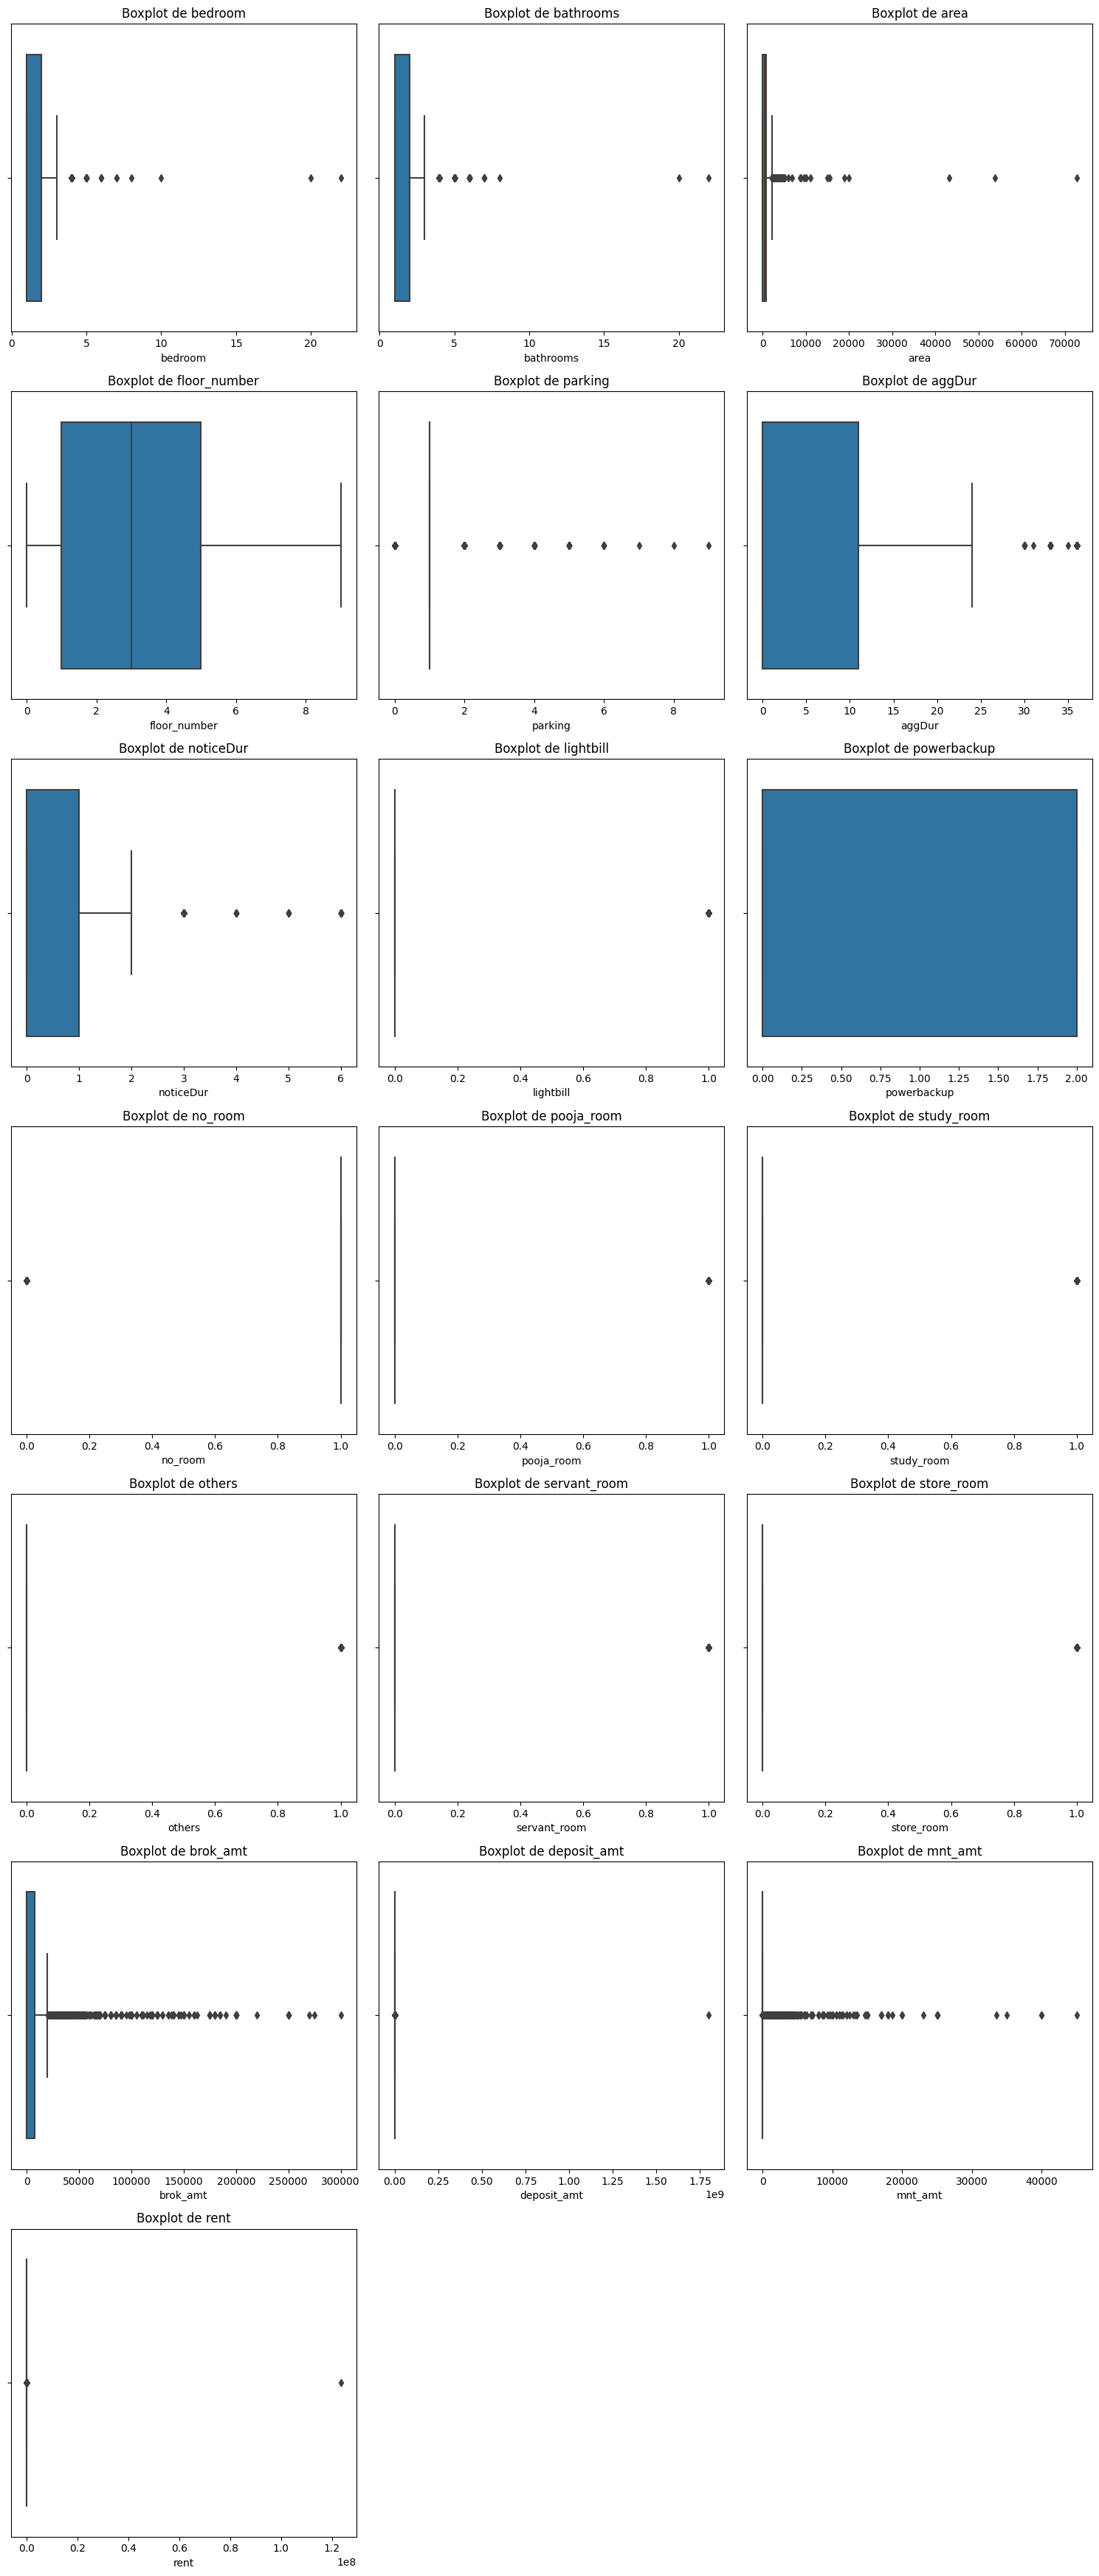

In [ ]:
graficar_boxplot_variables_continuas(df)

In [ ]:
def eliminar_outliers(df, multiplier=2.5):
    continuous_columns = df.select_dtypes(include=[np.number]).columns

    for column in continuous_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

Esta función toma el DataFrame y un valor opcional para el multiplicador del rango intercuartil (2.5). La función recorre todas las columnas de variables continuas, calcula el IQR y los límites inferior y superior, y filtra el DataFrame para mantener solo las filas dentro de estos límites.

el valor multiplier 2.5 amplía el rango aceptable de valores y reduce la cantidad de valores considerados atípicos

In [ ]:
df = eliminar_outliers(df)
print("Data sin valores atípicos:")
df.head()

Data sin valores atípicos:


,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
1,2,2,1050.0,Semifurnished,All,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",2,West,Not provided,Yes,...,0,0,0,0,0,0,0,63000,0.0,21000.0
2,2,2,900.0,Semifurnished,All,"Simplicity Apartments, Handewadi, , Pune, Maha...",6,No Direction,Not provided,Yes,...,0,0,0,0,0,0,0,25000,0.0,12000.0
5,1,1,0.0,Unfurnished,All,"New Sanghvi, , Pune, Maharashtra",1,No Direction,Not provided,No,...,0,0,0,0,0,0,0,20000,0.0,10000.0
9,1,1,590.0,Unfurnished,All,"Urban Bliss, Lohegaon, , Pune, Maharashtra",3,North,Others,Yes,...,0,0,0,0,0,0,0,25000,0.0,11000.0
10,2,2,1055.0,Semifurnished,"Family , Bachelors (Women Only)","Magarpatta Cosmos Apartment, Hadapsar, , Pune,...",9,East,Vitrified,Yes,...,0,0,0,0,0,0,0,50000,0.0,19000.0


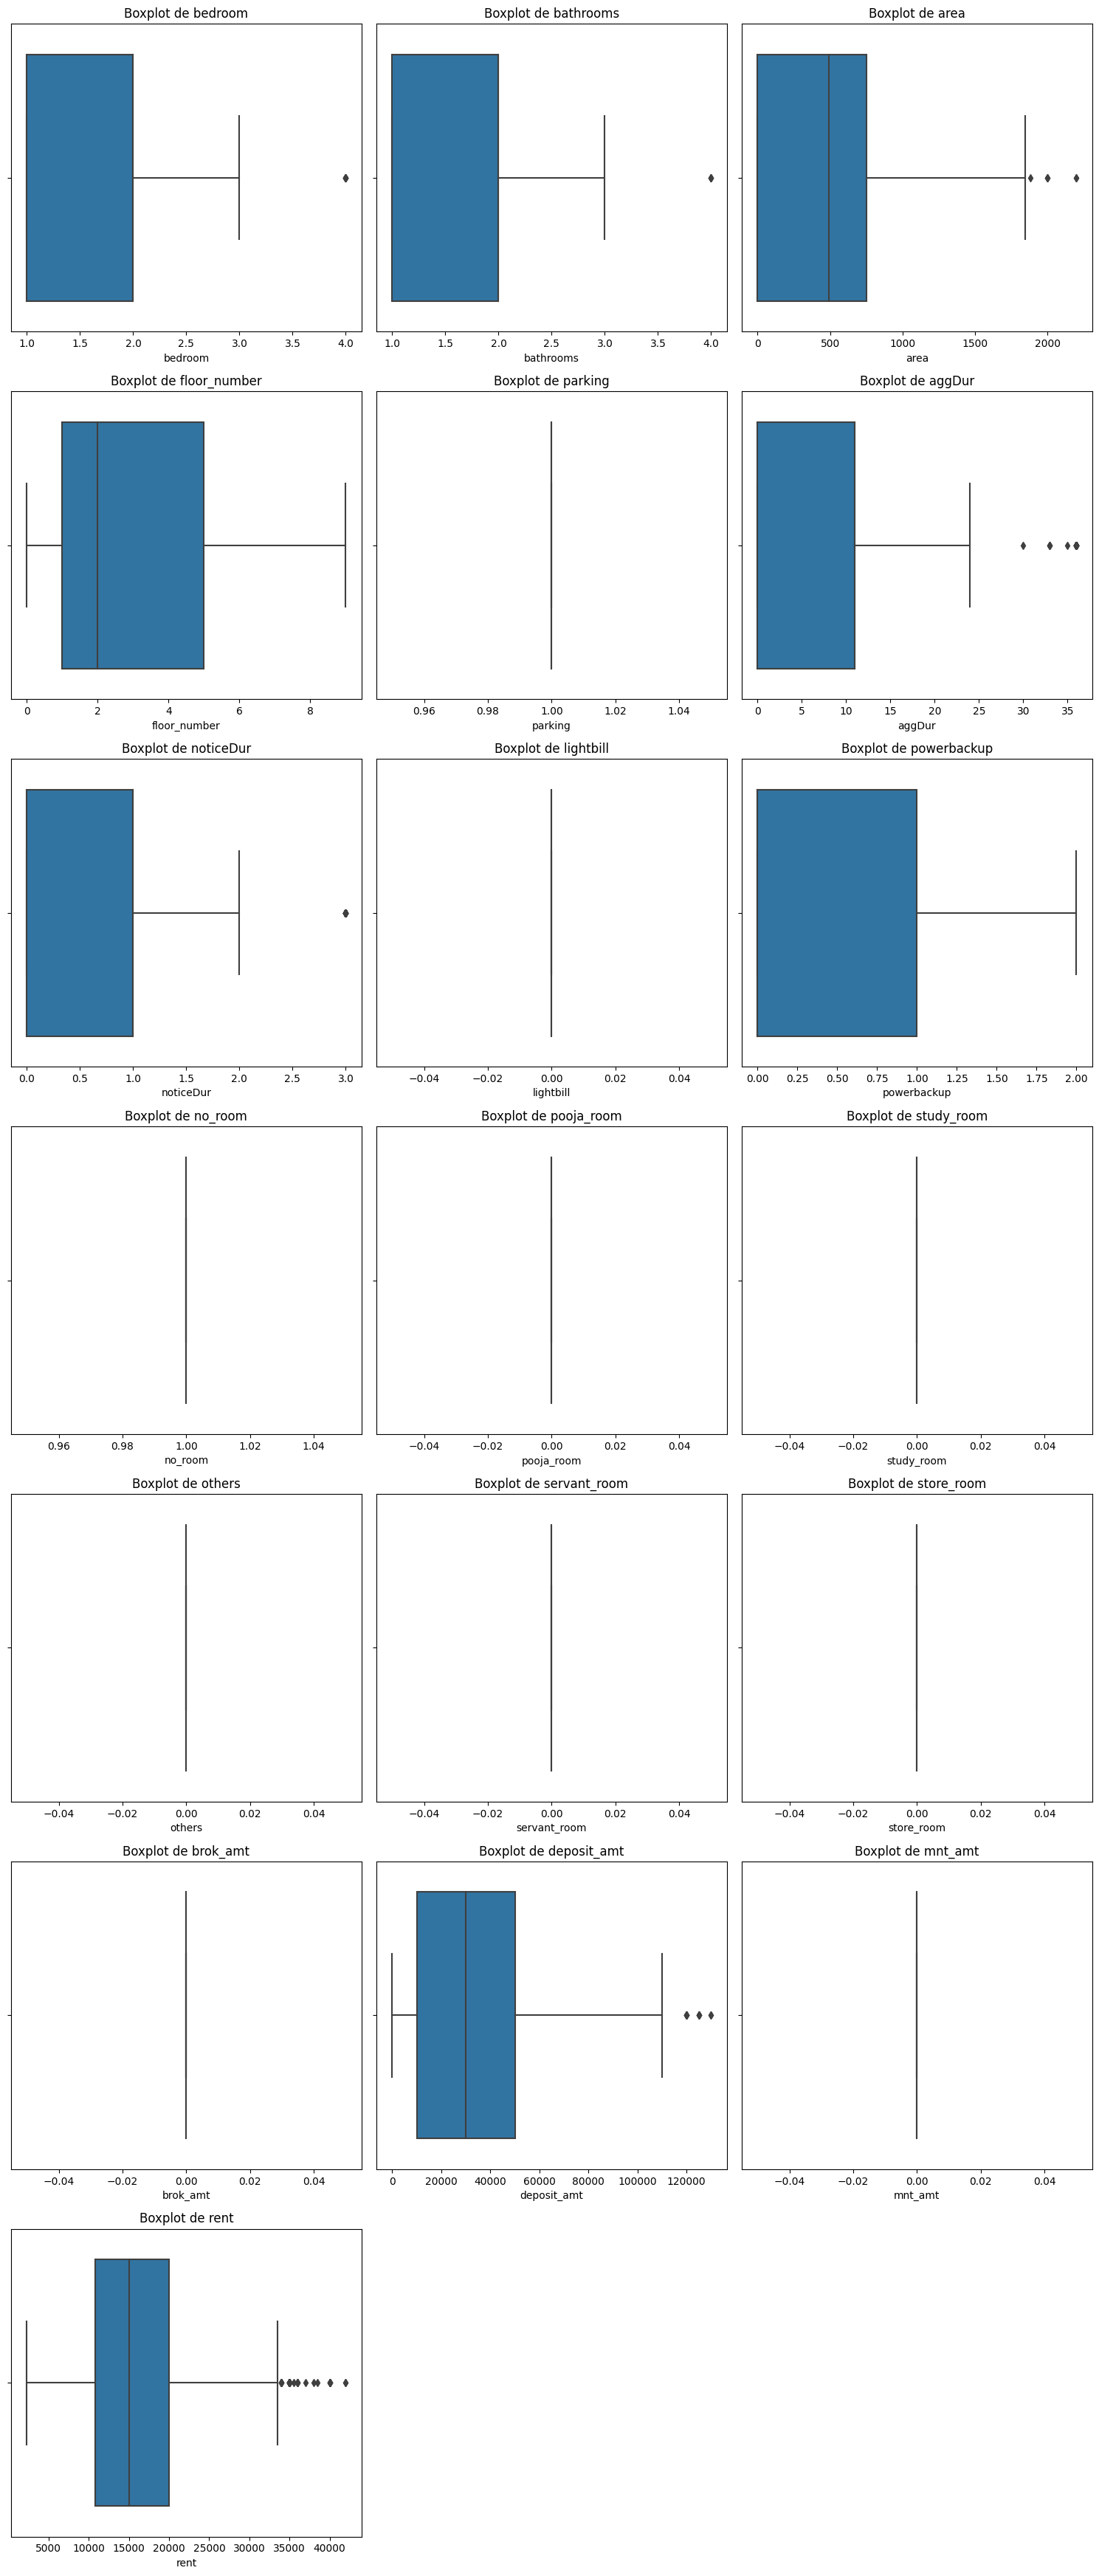

In [ ]:
graficar_boxplot_variables_continuas(df)

In [ ]:
# Uso de la función
outlier_columns = detectar_outliers(df)

print("Columnas con valores atípicos:", outlier_columns)

Columnas con valores atípicos: []


In [ ]:
def eliminar_columnas_categ_altas(df, threshold=10):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    for column in categorical_columns:
        if len(df[column].unique()) > threshold:
            df = df.drop(column, axis=1)

    return df


La función eliminar_columnas_categ_altas() toma el DataFrame y un valor umbral opcional (10). La función selecciona las columnas con datos categóricos y, para cada una de ellas, si el número de clases únicas es mayor que el umbral, se elimina la columna del DataFrame.

In [ ]:
df = eliminar_columnas_categ_altas(df, threshold=10)
df.head()

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,gate_community,corner_pro,parking,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
1,2,2,1050.0,Semifurnished,All,2,West,Yes,Yes,1,...,0,0,0,0,0,0,0,63000,0.0,21000.0
2,2,2,900.0,Semifurnished,All,6,No Direction,Yes,No,1,...,0,0,0,0,0,0,0,25000,0.0,12000.0
5,1,1,0.0,Unfurnished,All,1,No Direction,No,No,1,...,0,0,0,0,0,0,0,20000,0.0,10000.0
9,1,1,590.0,Unfurnished,All,3,North,Yes,No,1,...,0,0,0,0,0,0,0,25000,0.0,11000.0
10,2,2,1055.0,Semifurnished,"Family , Bachelors (Women Only)",9,East,Yes,Yes,1,...,0,0,0,0,0,0,0,50000,0.0,19000.0


In [ ]:
def codificar_columnas_categ(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    for column in categorical_columns:
        if len(df[column].unique()) == 2:
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
        else:
            dummies = pd.get_dummies(df[column], prefix=column)
            df = pd.concat([df.drop(column, axis=1), dummies], axis=1)

    return df

La función codificar_columnas_categ() toma el DataFrame. La función selecciona las columnas con datos categóricos y, para cada una de ellas, si el número de clases únicas es igual a 2, se realiza la codificación de etiquetas (Label Encoding) utilizando la clase LabelEncoder de sklearn.preprocessing. Si el número de clases únicas es mayor que 2, se realiza la codificación One-Hot utilizando la función pd.get_dummies().

In [ ]:
df = codificar_columnas_categ(df)
print("Data codificada:")
df.head()

Data codificada:


,bedroom,bathrooms,area,floor_number,gate_community,corner_pro,parking,wheelchairadption,petfacility,aggDur,...,facing_South-East,facing_South-West,facing_West,propertyage_0 to 1 Year Old,propertyage_1 to 5 Year Old,propertyage_10+ Year Old,propertyage_5 to 10 Year Old,propertyage_NO age,propertyage_Under Construction,maintenance_amt_0
1,2,2,1050.0,2,1,1,1,1,1,24,...,0,0,1,1,0,0,0,0,0,1
2,2,2,900.0,6,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,1,1,0.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,1,1,590.0,3,1,0,1,0,1,11,...,0,0,0,0,0,0,1,0,0,1
10,2,2,1055.0,9,1,1,1,0,0,11,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
def plot_correlaciones(df, target_variable, figsize=(10, 6)):
    continuous_columns = df.select_dtypes(include=[np.number]).columns

    correlations = df[continuous_columns].corr(method='spearman')[target_variable].drop(target_variable)
    correlations_sorted = correlations.abs().sort_values(ascending=False)

    plt.figure(figsize=figsize)
    sns.barplot(x=correlations_sorted.index, y=correlations_sorted, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.xlabel('Variables')
    plt.ylabel('Correlación')
    plt.title(f'Correlación de variables con {target_variable}')
    plt.show()

Esta función toma el DataFrame, el nombre de la variable dependiente (rent) y un tamaño opcional para el gráfico. La función calcula las correlaciones entre las variables continuas y la variable dependiente, ordena los valores absolutos de las correlaciones de mayor a menor, y crea un gráfico de barras utilizando seaborn.

Correlación de Spearman (coeficiente de correlación de Spearman): Mide la relación monótona entre dos variables. A diferencia de la correlación de Pearson, la correlación de Spearman se basa en rangos en lugar de valores brutos, lo que la hace menos sensible a valores atípicos y relaciones no lineales. El coeficiente de correlación de Spearman también varía entre -1 y 1, con interpretaciones similares a las de la correlación de Pearson.

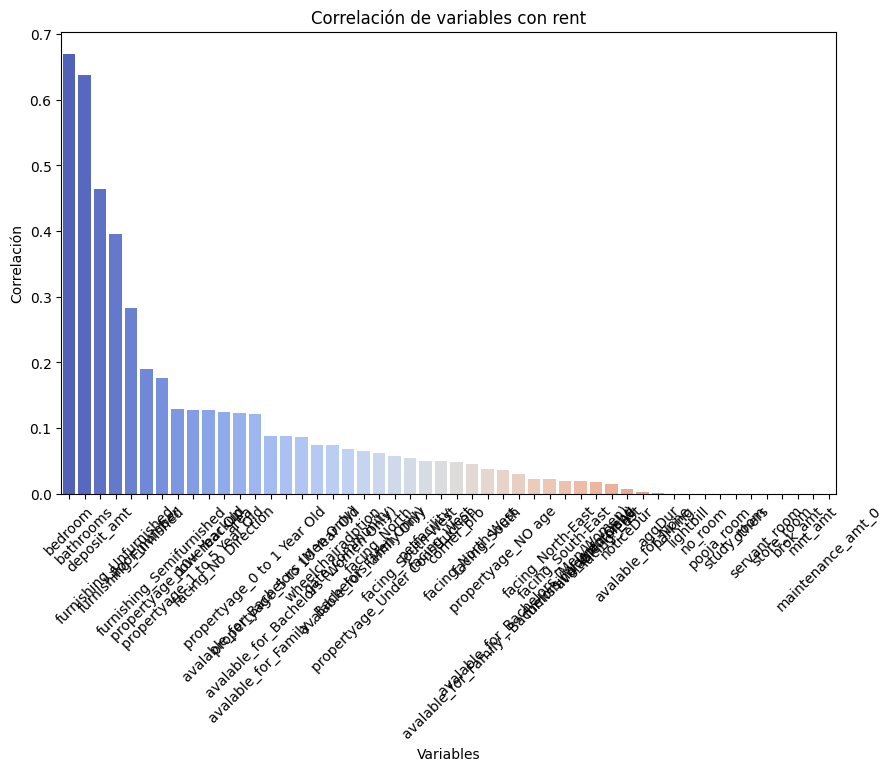

In [ ]:
# Uso de la función
target_variable = 'rent'
plot_correlaciones(df, target_variable)

In [ ]:
df.corr()['rent']

bedroom                                         0.660276
bathrooms                                       0.627538
area                                            0.121536
floor_number                                    0.154910
gate_community                                  0.056424
corner_pro                                      0.043678
parking                                              NaN
wheelchairadption                               0.069769
petfacility                                     0.052863
aggDur                                          0.022628
noticeDur                                       0.009864
lightbill                                            NaN
powerbackup                                     0.105697
no_room                                              NaN
pooja_room                                           NaN
study_room                                           NaN
others                                               NaN
servant_room                   

In [ ]:
def eliminar_columnas_baja_corr_nan(df, target_variable, threshold=0.05):
    continuous_columns = df.select_dtypes(include=[np.number]).columns
    correlations = df[continuous_columns].corr()[target_variable].drop(target_variable, errors='ignore')

    low_corr_or_nan_columns = correlations[(correlations.abs() < threshold) | correlations.isna()].index
    df = df.drop(low_corr_or_nan_columns, axis=1)

    return df

Esta función toma el DataFrame, el nombre de la variable dependiente y un valor umbral opcional (en este caso, 0.10). La función calcula las correlaciones entre las variables continuas y la variable dependiente, identifica las columnas con una correlación absoluta menor al umbral o con correlación NaN y elimina esas columnas del DataFrame.

In [ ]:
target_variable = 'rent'
df = eliminar_columnas_baja_corr_nan(df, target_variable, threshold=0.10)


,bedroom,bathrooms,area,floor_number,powerbackup,deposit_amt,rent,furnishing_Furnished,furnishing_Semifurnished,furnishing_Unfurnished,facing_No Direction,propertyage_0 to 1 Year Old,propertyage_1 to 5 Year Old,propertyage_10+ Year Old
1,2,2,1050.0,2,1,63000,21000.0,0,1,0,0,1,0,0
2,2,2,900.0,6,2,25000,12000.0,0,1,0,1,0,0,0
5,1,1,0.0,1,0,20000,10000.0,0,0,1,1,0,0,0
9,1,1,590.0,3,1,25000,11000.0,0,0,1,0,0,0,0
10,2,2,1055.0,9,0,50000,19000.0,0,1,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4595 entries, 1 to 16040
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bedroom                      4595 non-null   int64  
 1   bathrooms                    4595 non-null   int64  
 2   area                         4595 non-null   float64
 3   floor_number                 4595 non-null   int64  
 4   powerbackup                  4595 non-null   int64  
 5   deposit_amt                  4595 non-null   int64  
 6   rent                         4595 non-null   float64
 7   furnishing_Furnished         4595 non-null   uint8  
 8   furnishing_Semifurnished     4595 non-null   uint8  
 9   furnishing_Unfurnished       4595 non-null   uint8  
 10  facing_No Direction          4595 non-null   uint8  
 11  propertyage_0 to 1 Year Old  4595 non-null   uint8  
 12  propertyage_1 to 5 Year Old  4595 non-null   uint8  
 13  propertyage_10+ Y

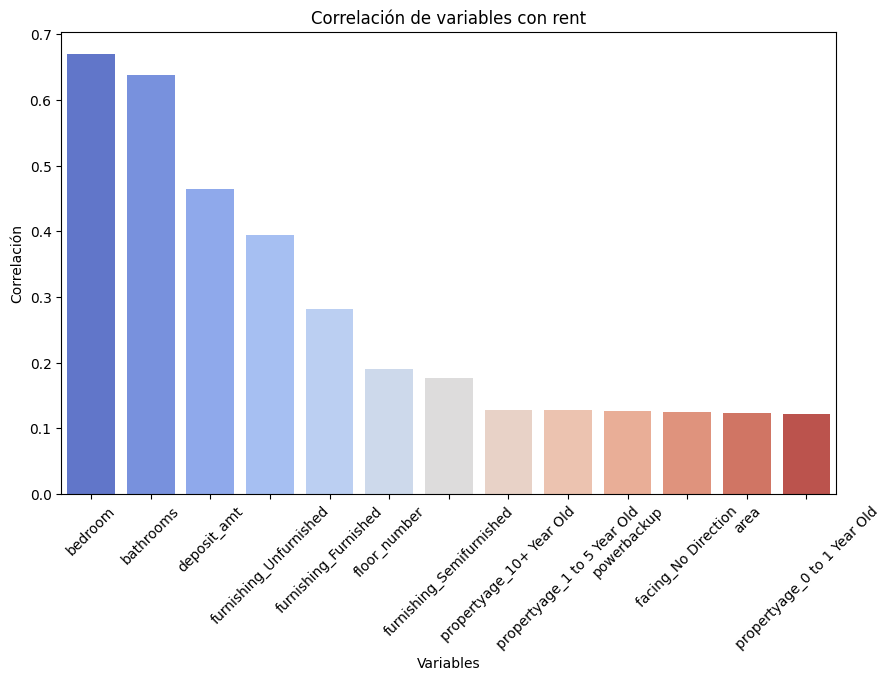

In [ ]:
target_variable = 'rent'
plot_correlaciones(df, target_variable)

In [ ]:
df.columns

Index(['bedroom', 'bathrooms', 'area', 'floor_number', 'powerbackup',
       'deposit_amt', 'rent', 'furnishing_Furnished',
       'furnishing_Semifurnished', 'furnishing_Unfurnished',
       'facing_No Direction', 'propertyage_0 to 1 Year Old',
       'propertyage_1 to 5 Year Old', 'propertyage_10+ Year Old'],
      dtype='object')

In [ ]:
df.describe()

,bedroom,bathrooms,area,floor_number,powerbackup,deposit_amt,rent,furnishing_Furnished,furnishing_Semifurnished,furnishing_Unfurnished,facing_No Direction,propertyage_0 to 1 Year Old,propertyage_1 to 5 Year Old,propertyage_10+ Year Old
count,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.00000,4595.000000
mean,1.730794,1.705550,434.405123,3.063330,0.493362,31772.778672,15570.848198,0.176496,0.415016,0.408270,0.460501,0.129489,0.34494,0.204135
std,0.638006,0.608424,419.035688,2.407658,0.741304,25654.589909,6430.421360,0.381283,0.492778,0.491567,0.498492,0.335776,0.47540,0.403112
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,10000.000000,10850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.000000,2.000000,490.000000,2.000000,0.000000,30000.000000,15000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2.000000,2.000000,750.000000,5.000000,1.000000,50000.000000,20000.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.00000,0.000000
max,4.000000,4.000000,2200.000000,9.000000,2.000000,130000.000000,42000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [ ]:
def normalizar_columnas_limite(df, threshold=10):
    continuous_columns = df.select_dtypes(include=[np.number]).columns

    for column in continuous_columns:
        if df[column].max() > threshold:
            scaler = MinMaxScaler()
            df[column] = scaler.fit_transform(df[[column]])

    return df

La función normalizar_columnas_limite() toma el DataFrame y un valor umbral opcional (en este caso, 10). La función selecciona las columnas con datos numéricos y, para cada una de ellas, si el valor máximo de la columna es mayor que el umbral, se aplica la normalización Min-Max utilizando MinMaxScaler de sklearn.preprocessing.

In [ ]:
df = normalizar_columnas_limite(df, threshold=10)

In [ ]:
df.head()

,bedroom,bathrooms,area,floor_number,powerbackup,deposit_amt,rent,furnishing_Furnished,furnishing_Semifurnished,furnishing_Unfurnished,facing_No Direction,propertyage_0 to 1 Year Old,propertyage_1 to 5 Year Old,propertyage_10+ Year Old
1,2,2,0.477273,2,1,0.484615,0.471033,0,1,0,0,1,0,0
2,2,2,0.409091,6,2,0.192308,0.244332,0,1,0,1,0,0,0
5,1,1,0.000000,1,0,0.153846,0.193955,0,0,1,1,0,0,0
9,1,1,0.268182,3,1,0.192308,0.219144,0,0,1,0,0,0,0
10,2,2,0.479545,9,0,0.384615,0.420655,0,1,0,0,0,0,0


In [ ]:
X = df.drop('rent', axis=1)
y = df['rent']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.33, random_state=2)

In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((3078, 13), (3078,), (1517, 13), (1517,))

La función evaluar_modelos_regresion() toma cuatro parámetros: X_train, y_train, X_test y y_test. La función evalúa diferentes modelos de regresión utilizando las métricas R2_score, MAE, MAPE y MSE, y devuelve un DataFrame de Pandas con los resultados ordenados por el R2_score en orden descendente.